In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pwd

'C:\\Users\\admin\\Desktop'

In [7]:
# importer la data :
data= app_train= pd.read_csv(r"C:\Users\admin\Desktop\Nouveau dossier (7)\application_train.csv")

In [8]:
app_test= pd.read_csv(r"C:\Users\admin\Desktop\Nouveau dossier (7)\application_test.csv")

In [9]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#Afficher le nbr de lignes et de colonnes du jeu de données:
data.shape

(307511, 122)

In [13]:
# le jeu de donnnées est constisuté d'un nombre de données égale à:
data.size

37516342

In [14]:
# Le pourcentage de donnnées manquantes par rapport  au nombre total des données est:
data.isna().sum().sum()/data.size

0.24395941907129431

Text(0, 0.5, 'Pourcentage de données disponible ')

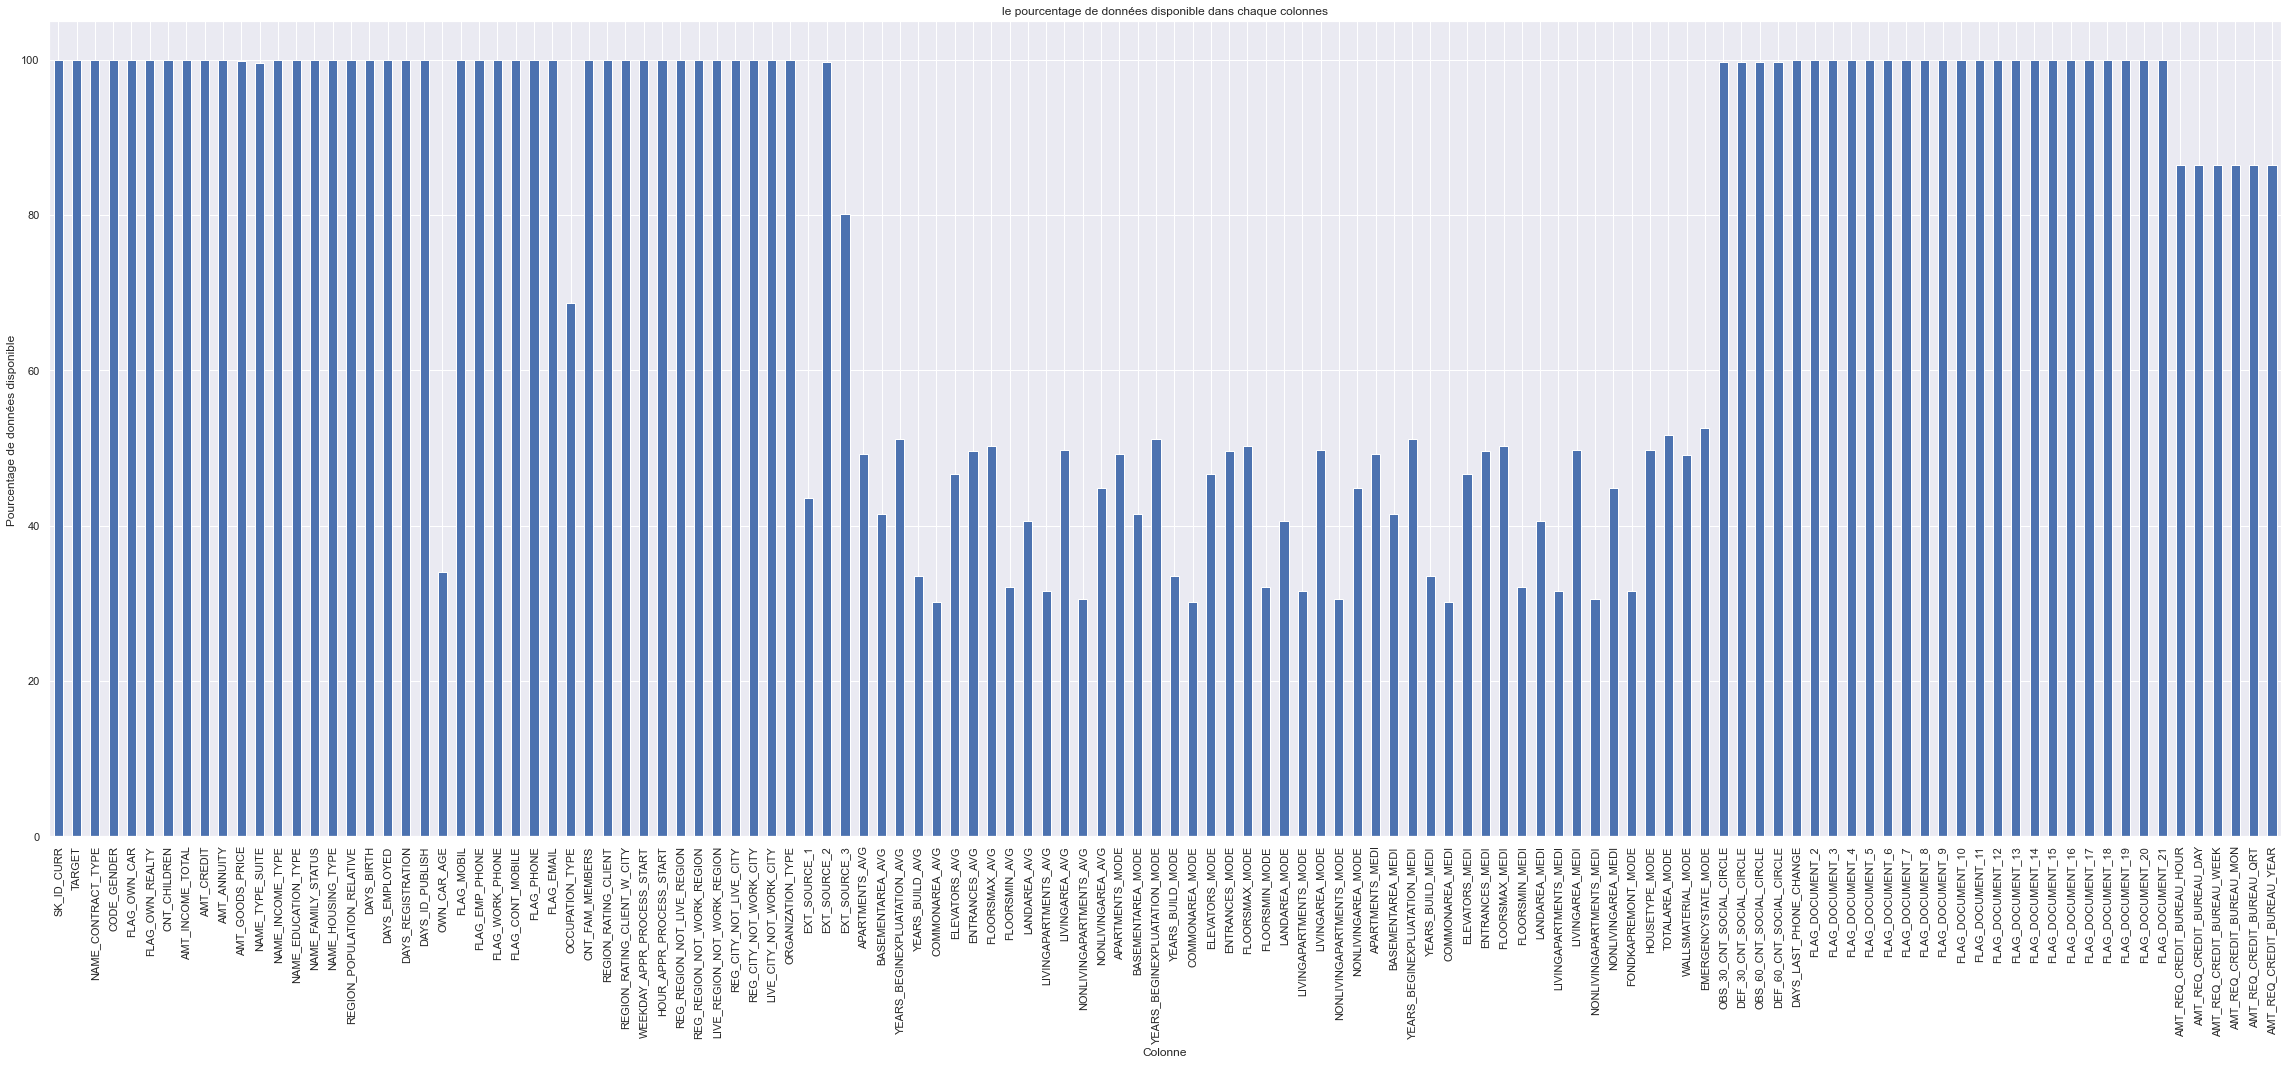

In [15]:
# Affichage du pourcentage de données disponible dans chaque colonnes
import seaborn as sns
sns.set()
plt.rcParams["figure.figsize"] = [40,15]
((len (data)- data.isna().sum())/len(data) *100).plot(kind='bar',figsize = (40, 15))
plt.title("le pourcentage de données disponible dans chaque colonnes")
plt.xlabel("Colonne")
plt.ylabel("Pourcentage de données disponible ")
    

In [16]:
data.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


In [19]:
# Afficher le nombre de données dupliqué (aucune valeur dupliqué dans le jeu de données)
len(data['SK_ID_CURR'].unique())/ len(data)

1.0

In [12]:
# Encoding Categorical Variables:

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
app_train=data

In [22]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [23]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


# Afficher la corrélation :

In [24]:
# Find correlations with the target and sort

correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations


print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

In [25]:
colonne= ['TARGET','OCCUPATION_TYPE_Laborers', 'FLAG_DOCUMENT_3','REG_CITY_NOT_LIVE_CITY','FLAG_EMP_PHONE','DAYS_EMPLOYED','NAME_EDUCATION_TYPE_Secondary / secondary special','REG_CITY_NOT_WORK_CITY','DAYS_ID_PUBLISH','CODE_GENDER_M','DAYS_LAST_PHONE_CHANGE','NAME_INCOME_TYPE_Working','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'DAYS_BIRTH']                                         
app_train[colonne]
corr_matrix = app_train.corr()
corr_matrix[colonne].loc[colonne]

,TARGET,OCCUPATION_TYPE_Laborers,FLAG_DOCUMENT_3,REG_CITY_NOT_LIVE_CITY,FLAG_EMP_PHONE,DAYS_EMPLOYED,NAME_EDUCATION_TYPE_Secondary / secondary special,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,CODE_GENDER_M,DAYS_LAST_PHONE_CHANGE,NAME_INCOME_TYPE_Working,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,DAYS_BIRTH
TARGET,1.000000,0.043019,0.044346,0.044395,0.045982,-0.044932,0.049824,0.050994,0.051457,0.054713,0.055218,0.057481,0.058899,0.060893,0.078239
OCCUPATION_TYPE_Laborers,0.043019,1.000000,0.078676,0.020013,0.219149,-0.219272,0.132427,0.114263,0.043492,0.235741,0.002242,0.204414,0.011683,0.011690,0.142519
FLAG_DOCUMENT_3,0.044346,0.078676,1.000000,0.003117,0.248534,-0.249082,0.060650,0.056275,0.050309,-0.087258,-0.061760,0.164231,0.062528,0.067083,0.109666
REG_CITY_NOT_LIVE_CITY,0.044395,0.020013,0.003117,1.000000,0.092166,-0.090516,-0.022009,0.440409,0.076326,0.048257,0.054183,0.032899,0.035741,0.045669,0.180382
FLAG_EMP_PHONE,0.045982,0.219149,0.248534,0.092166,1.000000,-0.999755,-0.107785,0.256427,0.273611,0.157239,-0.021103,0.484134,-0.032871,-0.034712,0.619888
DAYS_EMPLOYED,-0.044932,-0.219272,-0.249082,-0.090516,-0.999755,1.000000,0.107360,-0.254559,-0.272378,-0.156003,0.023032,-0.483907,0.032750,0.034624,-0.615864
NAME_EDUCATION_TYPE_Secondary / secondary special,0.049824,0.132427,0.060650,-0.022009,-0.107785,0.107360,1.000000,0.015404,-0.042497,0.004719,-0.004816,0.069859,0.065050,0.067983,-0.157389
REG_CITY_NOT_WORK_CITY,0.050994,0.114263,0.056275,0.440409,0.256427,-0.254559,0.015404,1.000000,0.099354,0.137581,0.046788,0.149716,0.008360,0.028081,0.242401
DAYS_ID_PUBLISH,0.051457,0.043492,0.050309,0.076326,0.273611,-0.272378,-0.042497,0.099354,1.000000,0.000132,0.088576,0.128708,-0.005103,-0.007737,0.272691
CODE_GENDER_M,0.054713,0.235741,-0.087258,0.048257,0.157239,-0.156003,0.004719,0.137581,0.000132,1.000000,0.025282,0.106282,-0.017885,-0.017288,0.148060


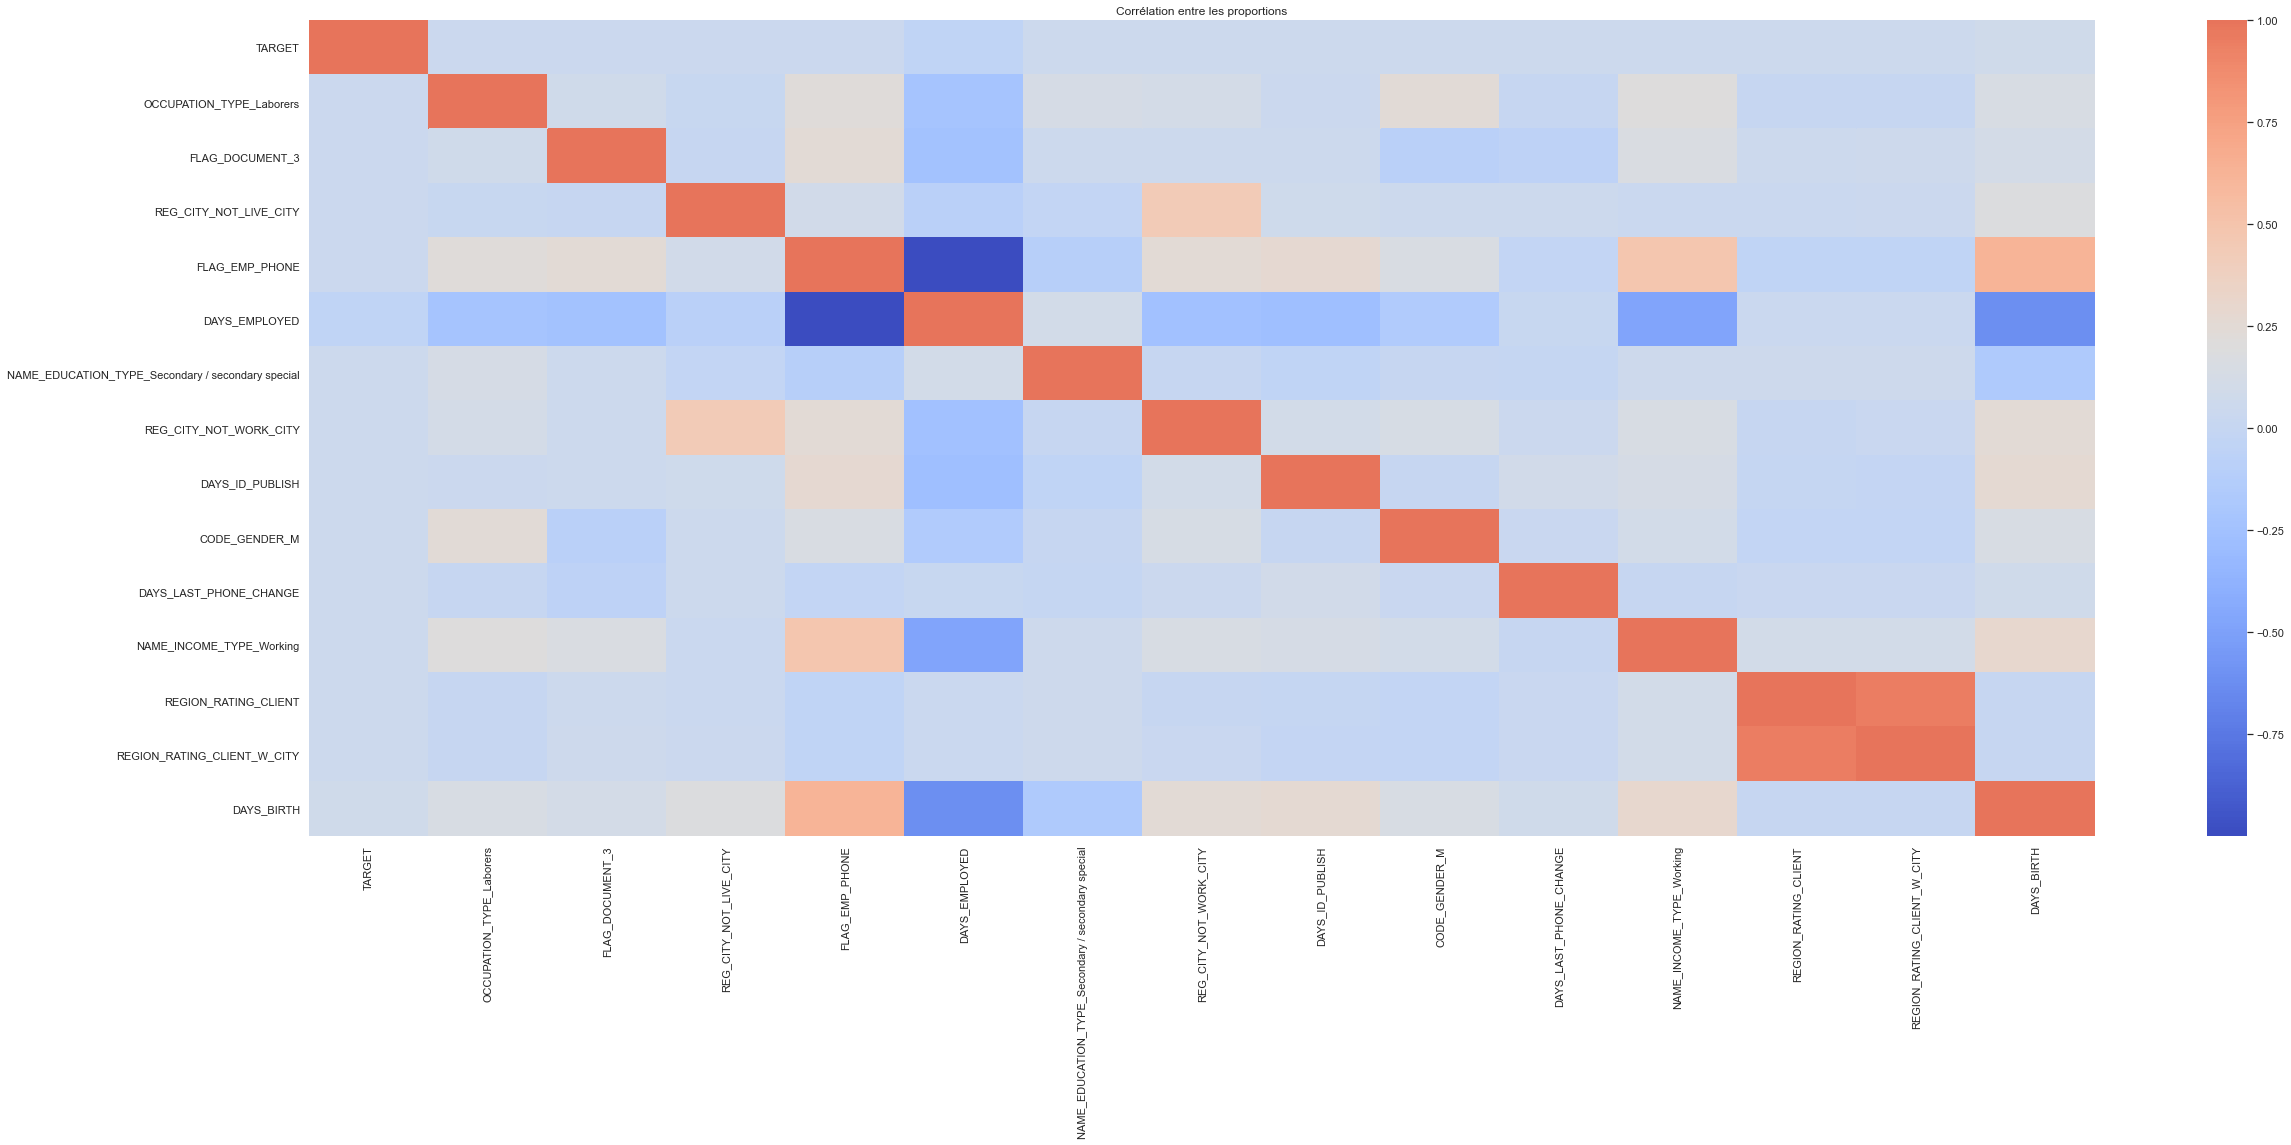

In [26]:
# Matrice de corrélation:
plt.title('Corrélation entre les proportions')
sns.heatmap(corr_matrix[colonne].loc[colonne], xticklabels=corr_matrix[colonne].loc[colonne].columns,yticklabels=corr_matrix[colonne].loc[colonne].columns, cmap='coolwarm' ,center=0.20)

In [27]:
colonne= ['TARGET','EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'NAME_EDUCATION_TYPE_Higher education', 'CODE_GENDER_F', 'NAME_INCOME_TYPE_Pensioner', 'ORGANIZATION_TYPE_XNA', 'FLOORSMAX_AVG','FLOORSMAX_MEDI','FLOORSMAX_MODE','EMERGENCYSTATE_MODE_No','HOUSETYPE_MODE_block of flats','AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE','ELEVATORS_AVG']                          
app_train[colonne]
corr_matrix = app_train.corr()
corr_matrix[colonne].loc[colonne]

,TARGET,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,NAME_EDUCATION_TYPE_Higher education,CODE_GENDER_F,NAME_INCOME_TYPE_Pensioner,ORGANIZATION_TYPE_XNA,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,EMERGENCYSTATE_MODE_No,HOUSETYPE_MODE_block of flats,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,ELEVATORS_AVG
TARGET,1.000000,-0.178919,-0.160472,-0.155317,-0.056593,-0.054704,-0.046209,-0.045987,-0.044003,-0.043768,-0.043226,-0.042201,-0.040594,-0.039645,-0.037227,-0.034199
EXT_SOURCE_3,-0.178919,1.000000,0.109167,0.186846,-0.022429,0.023066,0.115230,0.115263,0.003523,0.003808,0.004378,0.013572,0.012949,0.047717,-0.006001,0.007366
EXT_SOURCE_2,-0.160472,0.109167,1.000000,0.213982,0.124581,0.014611,-0.019468,-0.019508,0.135863,0.134612,0.130117,0.127258,0.123966,0.139367,0.198924,0.115058
EXT_SOURCE_1,-0.155317,0.186846,0.213982,1.000000,0.135180,0.306729,0.294434,0.294291,0.093151,0.092108,0.089760,0.098057,0.094268,0.175502,0.099997,0.074538
NAME_EDUCATION_TYPE_Higher education,-0.056593,-0.022429,0.124581,0.135180,1.000000,0.016031,-0.104323,-0.104254,0.144964,0.144331,0.141376,0.111107,0.107097,0.141135,0.066604,0.103685
CODE_GENDER_F,-0.054704,0.023066,0.014611,0.306729,0.016031,1.000000,0.157292,0.157316,-0.029307,-0.028982,-0.027944,0.029347,0.026641,-0.022505,-0.014066,-0.026610
NAME_INCOME_TYPE_Pensioner,-0.046209,0.115230,-0.019468,0.294434,-0.104323,0.157292,1.000000,0.999648,-0.016043,-0.016123,-0.015124,-0.010506,-0.009117,-0.063736,-0.004044,-0.009938
ORGANIZATION_TYPE_XNA,-0.045987,0.115263,-0.019508,0.294291,-0.104254,0.157316,0.999648,1.000000,-0.016038,-0.016118,-0.015121,-0.010526,-0.009131,-0.063569,-0.004037,-0.009886
FLOORSMAX_AVG,-0.044003,0.003523,0.135863,0.093151,0.144964,-0.029307,-0.016043,-0.016038,1.000000,0.997034,0.985689,0.136604,0.078637,0.108512,0.322652,0.680078
FLOORSMAX_MEDI,-0.043768,0.003808,0.134612,0.092108,0.144331,-0.028982,-0.016123,-0.016118,0.997034,1.000000,0.988237,0.136327,0.077858,0.107936,0.318319,0.677771


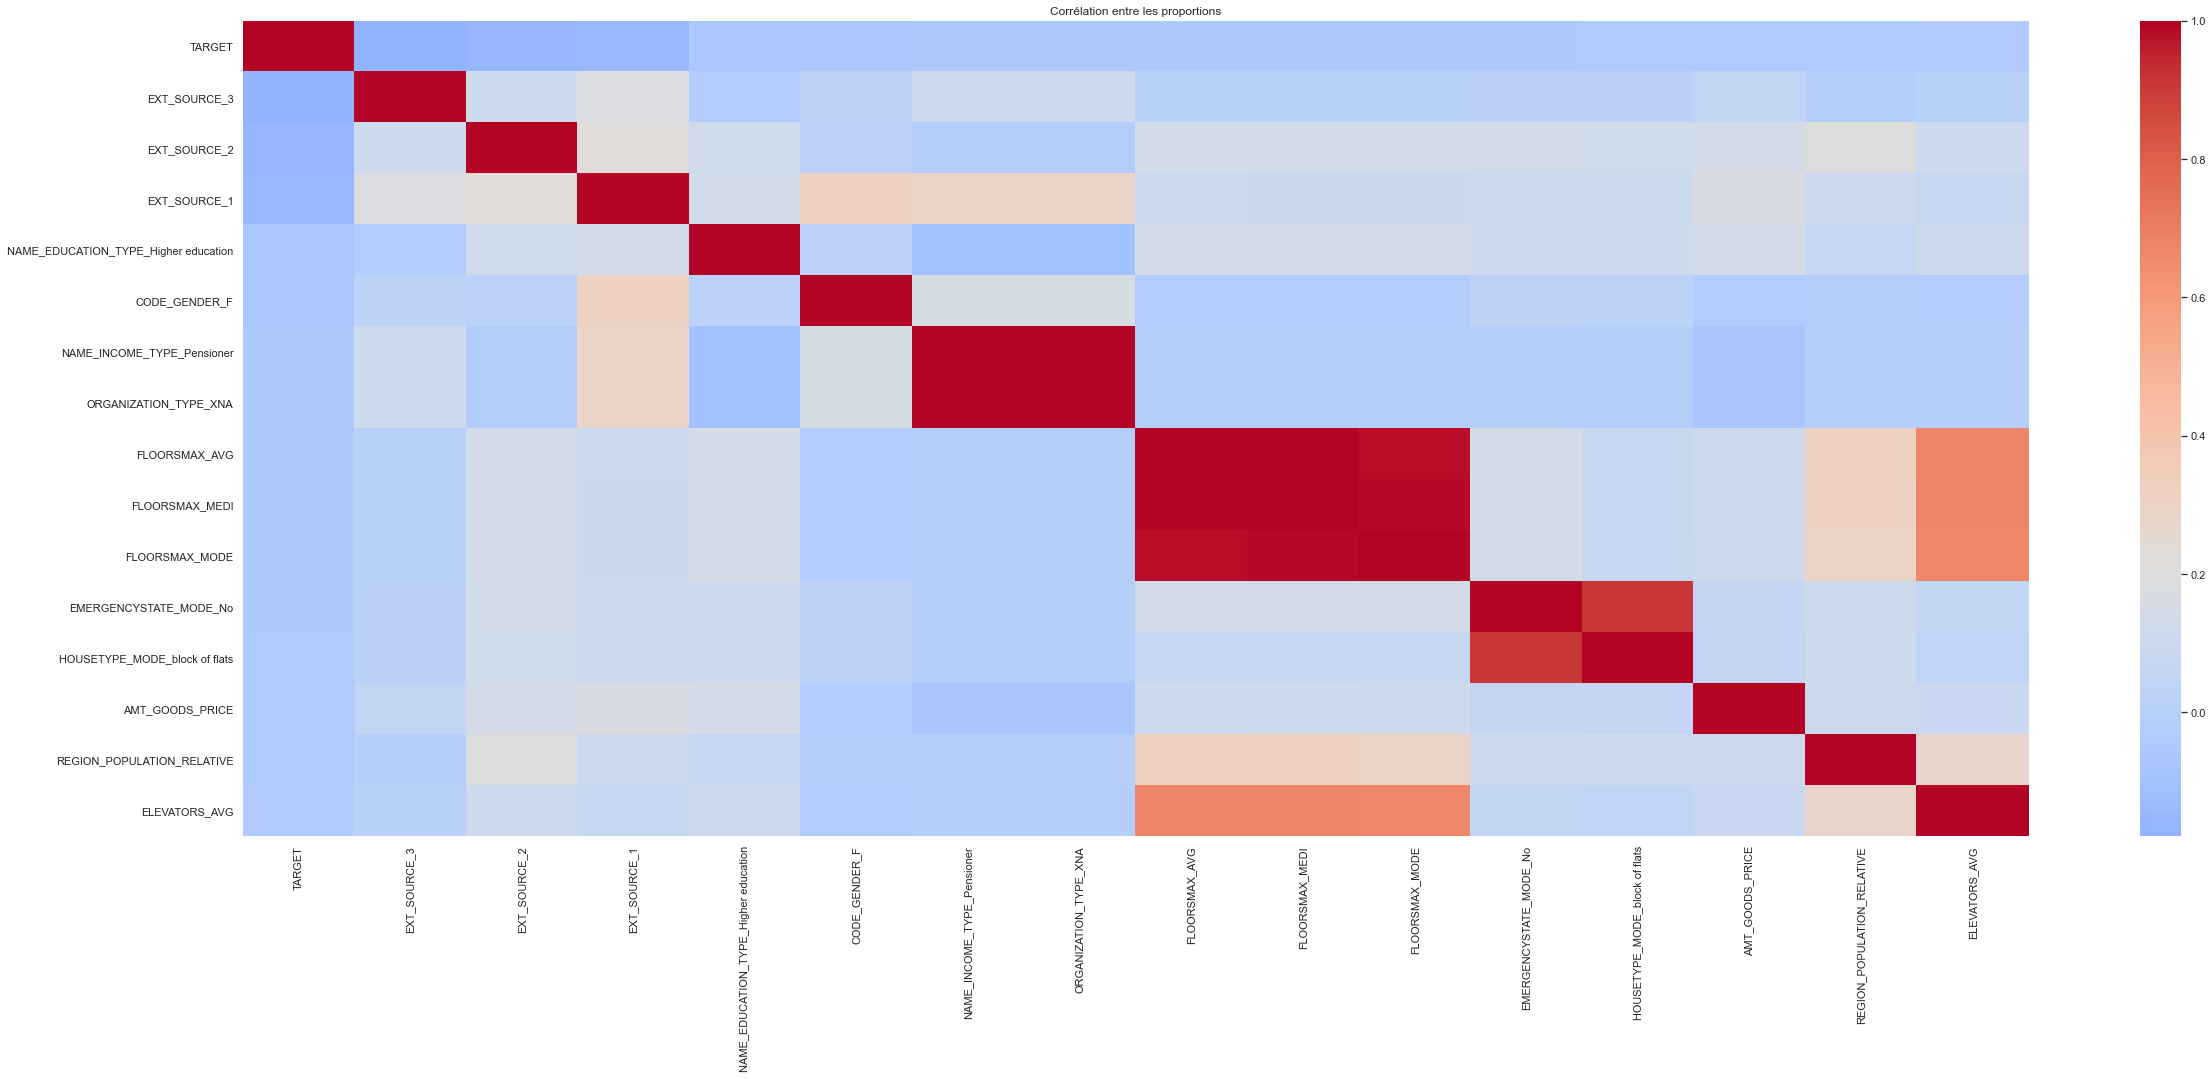

In [28]:
# Matrice de corrélation:
plt.title('Corrélation entre les proportions')
sns.heatmap(corr_matrix[colonne].loc[colonne], xticklabels=corr_matrix[colonne].loc[colonne].columns,yticklabels=corr_matrix[colonne].loc[colonne].columns, cmap='coolwarm' ,center=0.20)

In [29]:
colonne1= ['TARGET', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'REGION_POPULATION_RELATIVE', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'DAYS_EMPLOYED', 'SK_ID_CURR', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'HOUR_APPR_PROCESS_START','DAYS_ID_PUBLISH','DAYS_BIRTH']


In [30]:
app_train[colonne1]
corr_matrix = app_train.corr()
corr_matrix[colonne1].loc[colonne1]

,TARGET,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,AMT_CREDIT,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,AMT_ANNUITY,DAYS_EMPLOYED,SK_ID_CURR,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,HOUR_APPR_PROCESS_START,DAYS_ID_PUBLISH,DAYS_BIRTH
TARGET,1.000000,-0.178919,-0.160472,-0.155317,-0.030369,-0.003982,-0.037227,-0.039645,-0.012817,-0.044932,-0.002108,0.041975,0.055218,-0.024166,0.051457,0.078239
EXT_SOURCE_3,-0.178919,1.000000,0.109167,0.186846,0.043516,-0.030229,-0.006001,0.047717,0.030752,0.113434,0.000222,-0.107549,-0.075256,-0.040518,-0.131597,-0.205478
EXT_SOURCE_2,-0.160472,0.109167,1.000000,0.213982,0.131228,0.060925,0.198924,0.139367,0.125804,-0.020767,0.002342,-0.059913,-0.195764,0.156863,-0.050955,-0.091996
EXT_SOURCE_1,-0.155317,0.186846,0.213982,1.000000,0.168429,0.026232,0.099997,0.175502,0.119398,0.289848,0.000082,-0.181095,-0.132607,0.032007,-0.132375,-0.600610
AMT_CREDIT,-0.030369,0.043516,0.131228,0.168429,1.000000,0.156870,0.099738,0.986968,0.770138,-0.066838,-0.000343,0.009621,-0.073701,0.052738,-0.006575,-0.055436
AMT_INCOME_TOTAL,-0.003982,-0.030229,0.060925,0.026232,0.156870,1.000000,0.074796,0.159610,0.191657,-0.064223,-0.001820,0.027805,-0.018585,0.036459,0.008506,0.027261
REGION_POPULATION_RELATIVE,-0.037227,-0.006001,0.198924,0.099997,0.099738,0.074796,1.000000,0.103520,0.118429,-0.003980,0.000849,-0.053820,-0.044013,0.171285,-0.003993,-0.029582
AMT_GOODS_PRICE,-0.039645,0.047717,0.139367,0.175502,0.986968,0.159610,0.103520,1.000000,0.775109,-0.064842,-0.000232,0.011565,-0.076313,0.062320,-0.009267,-0.053442
AMT_ANNUITY,-0.012817,0.030752,0.125804,0.119398,0.770138,0.191657,0.118429,0.775109,1.000000,-0.104332,-0.000433,0.038514,-0.063747,0.052269,0.011268,0.009445
DAYS_EMPLOYED,-0.044932,0.113434,-0.020767,0.289848,-0.066838,-0.064223,-0.003980,-0.064842,-0.104332,1.000000,0.001366,-0.210242,0.023032,-0.091138,-0.272378,-0.615864


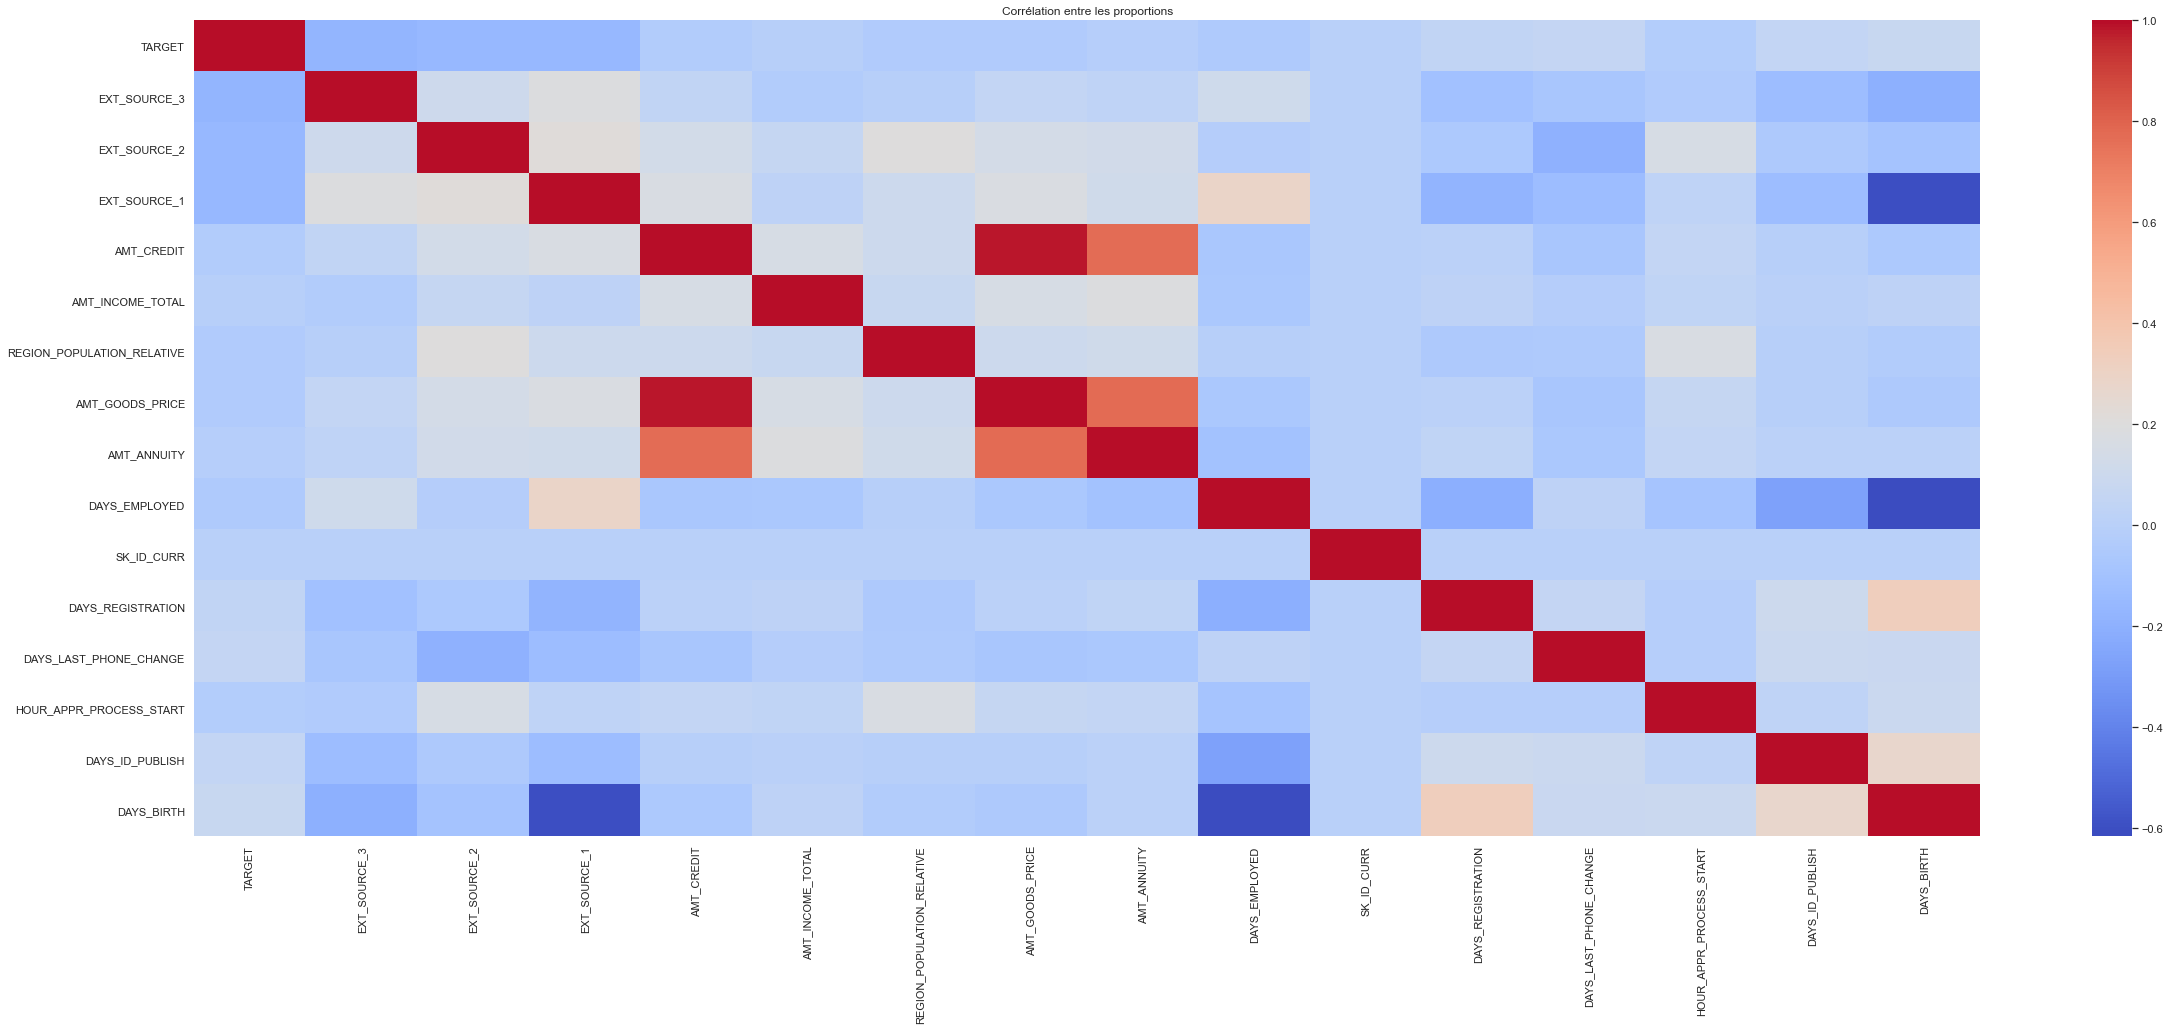

In [31]:
# Matrice de corrélation:
plt.title('Corrélation entre les proportions')
sns.heatmap(corr_matrix[colonne1].loc[colonne1], xticklabels=corr_matrix[colonne1].loc[colonne1].columns,yticklabels=corr_matrix[colonne1].loc[colonne1].columns, cmap='coolwarm' ,center=0.20)

# Exploration des variables:

In [32]:
# les variables qu'on va utiliser pour la modélisation :
['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'REGION_POPULATION_RELATIVE', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'DAYS_EMPLOYED', 'SK_ID_CURR', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'HOUR_APPR_PROCESS_START','DAYS_ID_PUBLISH','DAYS_BIRTH']

['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'AMT_CREDIT',
 'AMT_INCOME_TOTAL',
 'REGION_POPULATION_RELATIVE',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'DAYS_EMPLOYED',
 'SK_ID_CURR',
 'DAYS_REGISTRATION',
 'DAYS_LAST_PHONE_CHANGE',
 'HOUR_APPR_PROCESS_START',
 'DAYS_ID_PUBLISH',
 'DAYS_BIRTH']

Text(0, 0.5, 'Nombre de clients ayant cette probabilité')

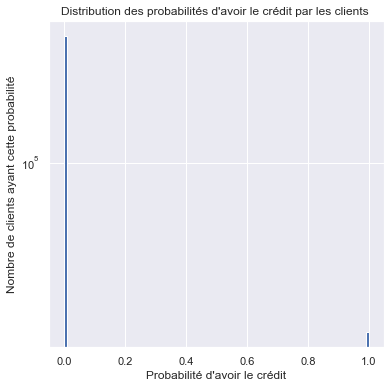

In [33]:
# Afficher la valeur cible Target:
sns.set()
plt.rcParams["figure.figsize"] = [6,6]
app_train.hist(column= 'TARGET',bins=100, log=True)
plt.title("Distribution des probabilités d'avoir le crédit par les clients ")
plt.xlabel("Probabilité d'avoir le crédit")
plt.ylabel("Nombre de clients ayant cette probabilité")

In [34]:
# Nombre de valeur manquante dans cette colonne:
data['TARGET'].isna().sum()

0

In [35]:
# Création de la colonne Age du client:
data['Age']= data['DAYS_BIRTH']/-365

In [36]:
data['Age'].describe(include='All')

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: Age, dtype: float64

Text(0, 0.5, 'Nombre de clients ayant cet age')

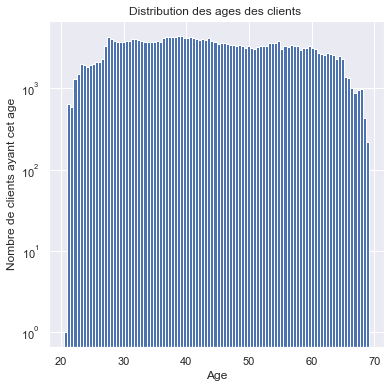

In [37]:
# Afficher la valeur cible Target:
sns.set()
plt.rcParams["figure.figsize"] = [6,6]
data.hist(column= 'Age',bins=100, log=True)
plt.title("Distribution des ages des clients ")
plt.xlabel("Age")
plt.ylabel("Nombre de clients ayant cet age")

In [33]:
# 'DAYS_EMPLOYED'

In [38]:
data['DAYS_EMPLOYED'].describe(include='All')

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0, 0.5, 'Nombre de clients ayant travailler ce nombre de jour')

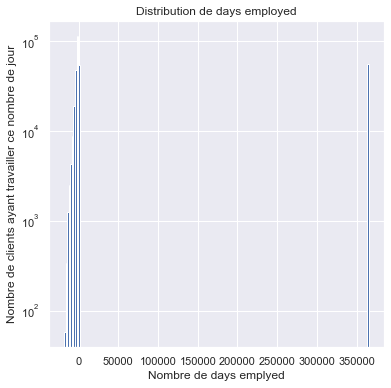

In [39]:
# Afficher la valeur days-employed:
sns.set()
plt.rcParams["figure.figsize"] = [6,6]
data.hist(column= 'DAYS_EMPLOYED',bins=200, log=True)
plt.title("Distribution de days employed")
plt.xlabel("Nombre de days emplyed")
plt.ylabel("Nombre de clients ayant travailler ce nombre de jour")

In [40]:
data['DAYS_EMPLOYED']

0           -637
1          -1188
2           -225
3          -3039
4          -3038
           ...  
307506      -236
307507    365243
307508     -7921
307509     -4786
307510     -1262
Name: DAYS_EMPLOYED, Length: 307511, dtype: int64

In [41]:
data['DAYS_EMPLOYED'].isna().sum()

0

In [42]:
data.loc[data['DAYS_EMPLOYED']>0,]['DAYS_EMPLOYED'].unique()

array([365243], dtype=int64)

In [43]:
data['DAYS_EMPLOYED'].replace(365243, value=np.nan, inplace=True)

In [44]:
data['DAYS_EMPLOYED'].dtypes

dtype('float64')

Text(0, 0.5, 'Nombre de clients ayant travailler ce nombre de jour')

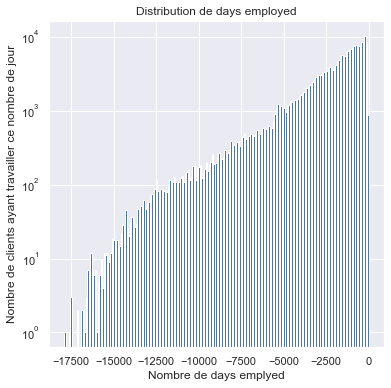

In [45]:
# Afficher la valeur days emplyed après nettoyage:
sns.set()
plt.rcParams["figure.figsize"] = [6,6]
data.hist(column= 'DAYS_EMPLOYED',bins=200, log=True)
plt.title("Distribution de days employed")
plt.xlabel("Nombre de days emplyed")
plt.ylabel("Nombre de clients ayant travailler ce nombre de jour")

In [46]:
 #les variables qu'on va utiliser pour la modélisation :
['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'REGION_POPULATION_RELATIVE', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'DAYS_EMPLOYED', 'SK_ID_CURR', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'HOUR_APPR_PROCESS_START','DAYS_ID_PUBLISH','DAYS_BIRTH']

['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'AMT_CREDIT',
 'AMT_INCOME_TOTAL',
 'REGION_POPULATION_RELATIVE',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'DAYS_EMPLOYED',
 'SK_ID_CURR',
 'DAYS_REGISTRATION',
 'DAYS_LAST_PHONE_CHANGE',
 'HOUR_APPR_PROCESS_START',
 'DAYS_ID_PUBLISH',
 'DAYS_BIRTH']

Text(0, 0.5, 'Nombre de client avec ce niveau')

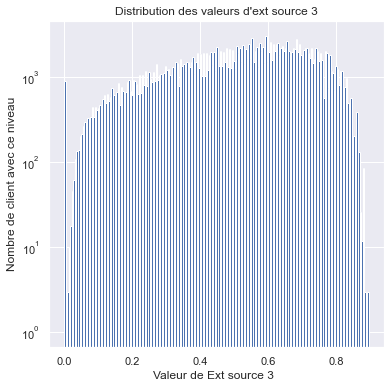

In [47]:
# Afficher la valeur EXT_SOURCE 3 après nettoyage:
sns.set()
plt.rcParams["figure.figsize"] = [6,6]
data.hist(column= 'EXT_SOURCE_3',bins=200, log=True)
plt.title("Distribution des valeurs d'ext source 3")
plt.xlabel("Valeur de Ext source 3  ")
plt.ylabel("Nombre de client avec ce niveau")

Text(0, 0.5, 'Nombre de client avec ce niveau')

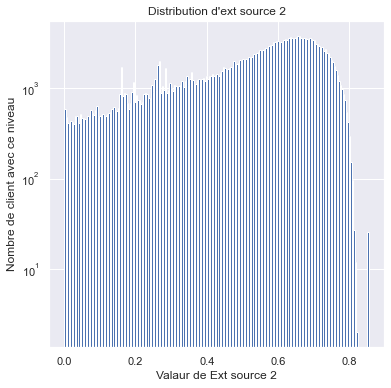

In [48]:
# Afficher la valeur EXT_SOURCE 2 après nettoyage:
sns.set()
plt.rcParams["figure.figsize"] = [6,6]
data.hist(column= 'EXT_SOURCE_2',bins=200, log=True)
plt.title("Distribution d'ext source 2")
plt.xlabel("Valaur de Ext source 2")
plt.ylabel("Nombre de client avec ce niveau")

In [49]:
data['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [50]:
data['EXT_SOURCE_2'].replace(8.549997e-01, value=np.nan, inplace=True)

Text(0, 0.5, 'Nombre de client avec ce niveau')

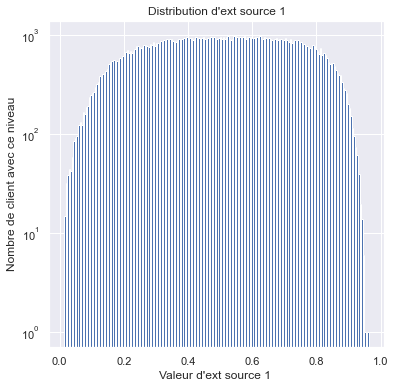

In [51]:
# Afficher la valeur EXT_SOURCE 1 après nettoyage:
sns.set()
plt.rcParams["figure.figsize"] = [6,6]
data.hist(column= 'EXT_SOURCE_1',bins=200, log=True)
plt.title("Distribution d'ext source 1")
plt.xlabel("Valeur d'ext source 1 ")
plt.ylabel("Nombre de client avec ce niveau")

Text(0, 0.5, 'Nombre de client avec ce niveau')

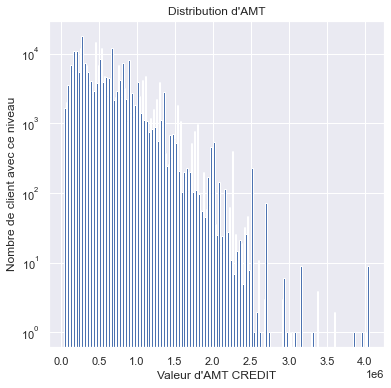

In [52]:
# Afficher la valeur AMT_CREDIT après nettoyage:
sns.set()
plt.rcParams["figure.figsize"] = [6,6]
data.hist(column= 'AMT_CREDIT',bins=200, log=True)
plt.title("Distribution d'AMT")
plt.xlabel("Valeur d'AMT CREDIT")
plt.ylabel("Nombre de client avec ce niveau")


In [53]:
data['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [45]:
#data['AMT_CREDIT'].replace(data['AMT_CREDIT']> 2.5e+06, value=np.nan, inplace=True)

Text(0, 0.5, 'Nombre de clients avec ce niveau')

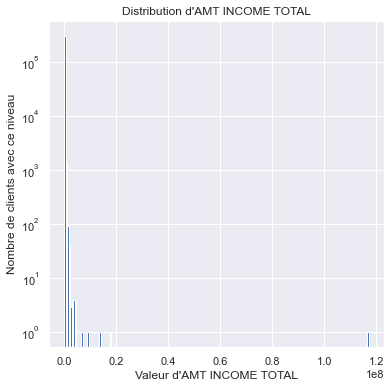

In [54]:
# Afficher la valeur AMT_INCOME_TOTAL après nettoyage:
sns.set()
plt.rcParams["figure.figsize"] = [6,6]
data.hist(column= 'AMT_INCOME_TOTAL',bins=200, log=True)
plt.title("Distribution d'AMT INCOME TOTAL")
plt.xlabel("Valeur d'AMT INCOME TOTAL")
plt.ylabel("Nombre de clients avec ce niveau")


In [55]:
data['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [56]:
data['AMT_INCOME_TOTAL'].replace( 1.170000e+08, value=np.nan, inplace=True)

Text(0, 0.5, 'Nombre de clients avec ce niveau')

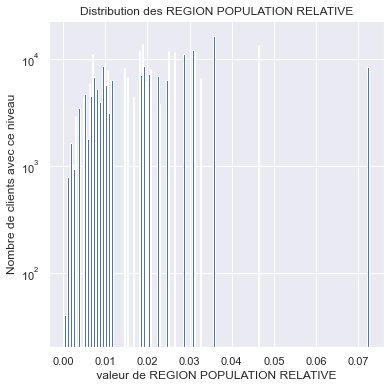

In [57]:
# Afficher la valeur 'REGION_POPULATION_RELATIVE' après nettoyage:
sns.set()
plt.rcParams["figure.figsize"] = [6,6]
data.hist(column= 'REGION_POPULATION_RELATIVE',bins=200, log=True)
plt.title("Distribution des REGION POPULATION RELATIVE")
plt.xlabel(" valeur de REGION POPULATION RELATIVE ")
plt.ylabel("Nombre de clients avec ce niveau")

In [58]:
data['REGION_POPULATION_RELATIVE'].describe()

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

In [59]:
data['REGION_POPULATION_RELATIVE'].replace( 0.072508, value=np.nan, inplace=True)

Text(0, 0.5, 'Nombre de clients avec ce niveau')

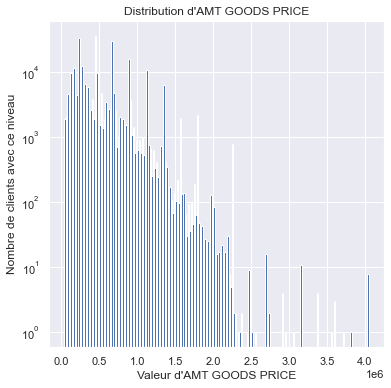

In [60]:
# Afficher la valeur 'AMT_GOODS_PRICE' après nettoyage:
sns.set()
plt.rcParams["figure.figsize"] = [6,6]
data.hist(column= 'AMT_GOODS_PRICE',bins=200, log=True)
plt.title("Distribution d'AMT GOODS PRICE")
plt.xlabel("Valeur d'AMT GOODS PRICE")
plt.ylabel("Nombre de clients avec ce niveau")

Text(0, 0.5, 'Nombre de clients ayant ce niveau')

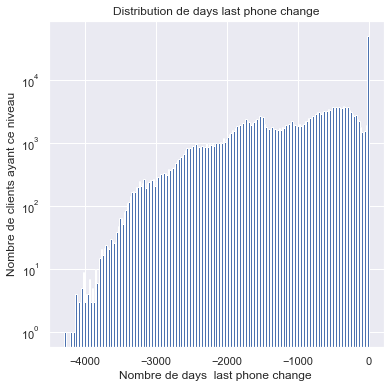

In [61]:
# Afficher la valeur 'DAYS_LAST_PHONE_CHANGE' après nettoyage:
sns.set()
plt.rcParams["figure.figsize"] = [6,6]
data.hist(column= 'DAYS_LAST_PHONE_CHANGE',bins=200, log=True)
plt.title("Distribution de days last phone change")
plt.xlabel("Nombre de days  last phone change ")
plt.ylabel("Nombre de clients ayant ce niveau")


Text(0, 0.5, 'Nombre de clients ayant ce niveau')

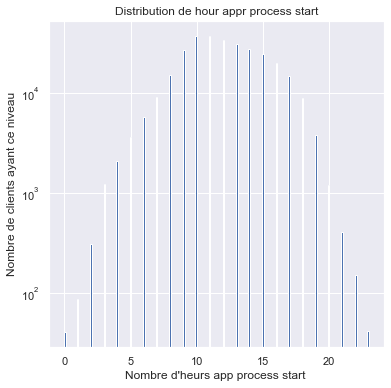

In [62]:

# Afficher la valeur 'HOUR_APPR_PROCESS_START' après nettoyage:
sns.set()
plt.rcParams["figure.figsize"] = [6,6]
data.hist(column= 'HOUR_APPR_PROCESS_START',bins=200, log=True)
plt.title("Distribution de hour appr process start")
plt.xlabel("Nombre d'heurs app process start ")
plt.ylabel("Nombre de clients ayant ce niveau")

Text(0, 0.5, 'Nombre de clients ayant ce niveau')

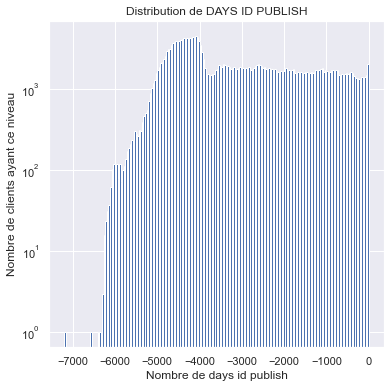

In [63]:
# Afficher la valeur 'DAYS_ID_PUBLISH'  après nettoyage:
sns.set()
plt.rcParams["figure.figsize"] = [6,6]
data.hist(column= 'DAYS_ID_PUBLISH',bins=200, log=True)
plt.title("Distribution de DAYS ID PUBLISH")
plt.xlabel("Nombre de days id publish")
plt.ylabel("Nombre de clients ayant ce niveau")

# Modélisation:

In [64]:
colonne= ['TARGET', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'REGION_POPULATION_RELATIVE', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'DAYS_EMPLOYED', 'SK_ID_CURR', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'HOUR_APPR_PROCESS_START','DAYS_ID_PUBLISH','DAYS_BIRTH']

data= app_train[colonne].dropna()

data.shape

(109483, 16)

In [65]:
col=['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'REGION_POPULATION_RELATIVE', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'DAYS_EMPLOYED', 'SK_ID_CURR', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'HOUR_APPR_PROCESS_START','DAYS_ID_PUBLISH','DAYS_BIRTH']

In [66]:
#Import train_test_split function

from sklearn.model_selection import train_test_split

X= data[col] # Features

y= data["TARGET"] # Labels

In [67]:
# Split dataset into training set and test set

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# pour résoudre le problème des deux classes déséquilibrés il existent plusieurs méthodes parmis lequelles on peut citer le suréchantillonange ou le souséchantillonnage.  
# Dans ce projet on va tester ces deus techniques pour régler le problème des classes déséquilibrées dans la variable cible Target
# Après séléctionner celle qui donne de bonne perfomance.

In [68]:
! pip install imbalanced-learn

In [69]:
! pip3 install imblearn

In [70]:
! pip install delayed

In [71]:
from imblearn.under_sampling import RandomUnderSampler

rUs = RandomUnderSampler()

X_train, y_train = rUs.fit_resample(X_training, y_training)

In [72]:
from sklearn import preprocessing

In [73]:
std_scale = preprocessing.StandardScaler().fit(X)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)


# Random Forest  avec le sous-échantiollonage :

In [74]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)

clf.fit(X_train,y_train)

y_pred_proba = clf.predict_proba(X_test)[:, 1]

In [75]:
#Import scikit-learn metrics module for accuracy calculation

from sklearn import metrics

# mesure de performance avec: Accuracy.
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6819607246156189


# Random Forest avec le suréchantillonnage:

In [68]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

X_train2, y_train2 = ros.fit_resample(X_training, y_training)

In [75]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)

clf.fit(X_train2,y_train2)

In [76]:
#Import scikit-learn metrics module for accuracy calculation

from sklearn import metrics

# mesure de performance avec: Accuracy.
y_pred1 = clf.predict(X_test)
y_pred2 = clf.predict(X_train2)
#y_pred=clf.predict(X_test)
print("Accuracy pour le jeu de test est :",metrics.accuracy_score(y_test, y_pred1))
print("Accuracy pour le jeu de d'entrainement est :",metrics.accuracy_score(y_train2, y_pred2))


Accuracy pour le jeu de test est : 0.924067590196377
Accuracy pour le jeu de d'entrainement est : 1.0


In [ ]:
# On remarque que le suréchantiollonage(0.92) donne de bonne performance par rapport au sous-échantiollonnage(0.68)
# toutefois on remarque que ça conduit à l'overffiting dans le jeu d'entrainement,donc pour la suite on va utiliser seulement le suréchantiollonnage. 

#  Création d'une nouvelle metric d'évaluation:


In [96]:
# Création d'une nouvelle metric d'évaluation plus adapté au besoin de l'entreprsie en utilisant la matrice de confusion:

In [97]:
# Afficher la matrice de confusion:
matrice = metrics.confusion_matrix(y_test, y_pred1)
score_entreprise= 10*matrice[1][1] + 20*matrice[0][0] -5*matrice[1][0]-50*matrice[0][1]
score_entreprise

591205

# Préparation des variables avec over-samling :

In [76]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

X_train, y_train = ros.fit_resample(X_training, y_training)

In [77]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

#  Entrainement et optimisation de Random Forest :

In [82]:
y_train=np.array(y_train)

In [83]:
y_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn import metrics

# début du temps écoulé pour application de notre algorithme:
#start_time = time.time()


# valeurs du paramètre C:
#alpha_range = np.logspace(-2, 2, 5)
# valeurs du paramètre gamma:
#gamma_range = np.logspace(-2, 1, 4)
# grille de paramètres:
#'max_features': [2, 3],'min_samples_leaf': [3, 4, 5],'min_samples_split': [8, 10, 12],
param_grid = {'max_depth': [60, 70 ,80, 90], 'n_estimators': [90 ,100, 150, 200] }

# score pour sélectionner le modèle optimal:
score = 'accuracy'

# initialiser la validation croisée:
grid_pred = model_selection.GridSearchCV(RandomForestClassifier(),param_grid,cv=5,scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement:
grid_pred.fit(X_train_std, y_train)

# prédire sur le jeu de test avec le modèle sélectionné:
y_test_pred_cv = grid_pred.predict(X_test_std)


In [85]:
# Afficher le précision (accurency) du milleur modèle obtenu:
y_test_pred_cv = grid_pred.predict(X_test_std)
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred_cv))

Accuracy: 0.9244633886436292


In [85]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, clf.predict(X_test)))

AUC : 0.6876
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     30399
           1       0.23      0.17      0.19      2446

    accuracy                           0.90     32845
   macro avg       0.58      0.56      0.57     32845
weighted avg       0.88      0.90      0.89     32845



In [99]:
# Afficher le score entreprise du milleur modèle obtenu:
y_test_pred_cv = grid_pred.predict(X_test_std)
matrice = metrics.confusion_matrix(y_test, y_test_pred_cv)
score_entreprise= 10*matrice[1][1] + 20*matrice[0][0] -5*matrice[1][0]-50*matrice[0][1]
print("le score entreprise du modèle est :",score_entreprise)

le score entreprise du modèle est : 592225


# Regression Logistique :

In [112]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [113]:
# valeurs des hyperparamtres et parametres :

c_values = np.logspace(-2, 2, 5)  # (exemple c=[100, 10, 1, 0.1, 0.001])

penalty= ['l2']

solvers = ['newton-cg', 'lbfgs', 'liblinear']


# grille de paramètres
param_grid = dict(solver=solvers,penalty=penalty,C=c_values)


# score pour sélectionner le modèle optimal
score = 'accuracy'

# initialiser la validation croisée  ),param_grid,cv=5,scoring=score)
grid_pred = model_selection.GridSearchCV(linear_model.LogisticRegression(),param_grid,cv=5,scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement
grid_pred.fit(X_train_std, y_train)



GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [114]:
# Afficher le precision (accurency) du milleur modèle obtenu:
y_test_pred_cv = grid_pred.predict(X_test_std)
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred_cv))

Accuracy: 0.6915207794184808


In [ ]:
#Afficher le Classification_report de la regression logistique  :
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, clf.predict(X_test)))

In [115]:
# Afficher le score entreprise du milleur modèle obtenu:
y_test_pred_cv = grid_pred.predict(X_test_std)
matrice = metrics.confusion_matrix(y_test, y_test_pred_cv)
score_entreprise= 10*matrice[1][1] + 20*matrice[0][0] -5*matrice[1][0]-50*matrice[0][1]
print("le score entreprise du modèle est :",score_entreprise)

le score entreprise du modèle est : -32290


# XGBoostClassifier :

In [72]:
!pip3 install xgboost

In [73]:
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn import metrics


In [92]:
# valeurs des hyperparamtres et parametres :

n_estimators = [500,600,700]

learning_rate = [0.5,0.05]

subsample = [0.7,1]

max_depth = [40]


# grille de paramètres
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)


# score pour sélectionner le modèle optimal
score = 'accuracy'

# initialiser la validation croisée  ),param_grid,cv=5,scoring=score)
grid_pred = model_selection.GridSearchCV(XGBClassifier(),param_grid,cv=5,scoring=score)
# exécuter la validation croisée sur le jeu d'entraînement
grid_pred.fit(X_train_std, y_train)

# prédire sur le jeu de test avec le modèle sélectionné 
y_test_pred_cv = grid_pred.predict(X_test_std)

C:\dossier\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\dossier\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:41:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\dossier\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:51:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\dossier\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:59:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\dossier\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:06:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\dossier\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:17:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\dossier\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:30:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\dossier\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:41:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\dossier\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:50:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\dossier\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:04:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\dossier\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:14:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [93]:
grid_pred.best_params_

{'learning_rate': 0.5, 'max_depth': 40, 'n_estimators': 600, 'subsample': 0.7}

In [94]:
# Afficher le precision (accurency) du milleur modèle obtenu:
y_test_pred_cv = grid_pred.predict(X_test_std)
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred_cv))

Accuracy: 0.9212056629623991


In [103]:
#Create a Classifier
clf=XGBClassifier( learning_rate= 0.125, max_depth= 7, n_estimators= 1125, subsample= 1, min_child_weight=1, random_state=5)

#Train the model using the training sets y_pred=clf.predict(X_test)

clf.fit(X_train,y_train)
# prédire sur le jeu de test avec le modèle sélectionné 
y_test_pred_cv = grid_pred.predict(X_test_std)

# Afficher le precision (accurency) du milleur modèle obtenu:

print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred_cv))

C:\dossier\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:29:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9212056629623991


In [83]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, clf.predict(X_test)))

AUC : 0.6876
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     30399
           1       0.23      0.17      0.19      2446

    accuracy                           0.90     32845
   macro avg       0.58      0.56      0.57     32845
weighted avg       0.88      0.90      0.89     32845



In [88]:
# Afficher le score entreprise du milleur modèle obtenu:
y_test_pred_cv = grid_pred.predict(X_test_std)
matrice = metrics.confusion_matrix(y_test, y_test_pred_cv)
score_entreprise= 10*matrice[1][1] + 20*matrice[0][0] -5*matrice[1][0]-50*matrice[0][1]
print("le score entreprise du modèle est :",score_entreprise)

le score entreprise du modèle est : 590490


In [ ]:
#Remarque :
#il exist aussi le modèle stacking qu'on peut tester qui combinent plusieurs modèles  comme les précédents (Algorithme XGBoost) : ce modèle prend en entrée la combinaison des probabilités a posteriori issues des algorithmes précisés ci-avant ainsi que le jeu de données de base. Le modèle stacking combine donc les approches de bagging (random forest) et boosting (xgboost).

# Synthèse des résultas des performances des modèles sous la forme d'un tableau:


In [89]:
#Synthèse des résultas sous la forme d'un tableau:
df = pd.DataFrame(columns= ['Model', 'AUC', 'Accuracy', 'Precision', 'Recall', 'F1_score'])
df['Model']=["XGBoost", "Random Forest", "Regression Logistic" ]
df.loc[df['Model']=='XGBoost',['AUC', 'Accuracy', 'Precision', 'Recall', 'F1_score']]=[0.6876,0.92, 0.93, 0.95, 0.94]
df.loc[df['Model']=='Regression Logistic',['AUC', 'Accuracy', 'Precision', 'Recall', 'F1_score']]=[0.5520,0.69, 0.94 ,0.50 ,0.65]
df.loc[df['Model']=='Random Forest',['AUC', 'Accuracy', 'Precision', 'Recall', 'F1_score']]=[0.68,0.92, 0.93 ,0.95 ,0.94]
df['score-entreprise']= [590490,592225,-32290]
df

,Model,AUC,Accuracy,Precision,Recall,F1_score,score-entreprise
0,XGBoost,0.6876,0.92,0.93,0.95,0.94,590490
1,Random Forest,0.68,0.92,0.93,0.95,0.94,592225
2,Regression Logistic,0.552,0.69,0.94,0.5,0.65,-32290


# Interprétation du model : l'importance des features 

In [79]:
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn import metrics

In [87]:
#Create le Classifier
clf=XGBClassifier( learning_rate= 0.125, max_depth= 7, n_estimators= 1125, subsample= 1.0,min_child_weight=1, random_state=5 )

#Train the model using the training sets y_pred=clf.predict(X_test)

clf.fit(X_train,y_train)

C:\dossier\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:57:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.125, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1125, n_jobs=4, num_parallel_tree=1, random_state=5,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [90]:
# Extract feature importances
feature_importance_values_domain = clf.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': col , 'importance': feature_importance_values_domain})

In [91]:
feature_importance_values_domain

array([0.11958671, 0.07686746, 0.09318328, 0.0645026 , 0.05317676,
       0.05178361, 0.07431808, 0.06516062, 0.06213437, 0.05404625,
       0.05424782, 0.05895992, 0.05151884, 0.05701631, 0.06349736],
      dtype=float32)

In [92]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

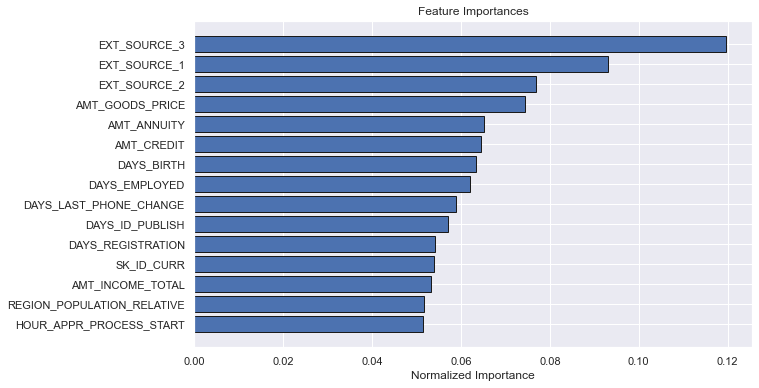

In [93]:
# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances_domain)

In [ ]:
# D'après ce graphe on comprends que les features les plus importantes pour notre modélisation sont les Ext_source et DAYS _EMPLOYED et AMT_CREDIT et AMT_GOODS_PRICE.c'est a dire qu'on peut reduire le nombre de features utulise pour la modélisation sans trop impacté les performances du modèle.

# Téléchargement du modèle pour l'utiliser sous forme d'une API:

In [1]:
# On va utiliser XGBClassifier:

In [94]:
#Create le Classifier
clf=XGBClassifier( learning_rate= 0.125, max_depth= 7, n_estimators= 1125, subsample= 1.0,min_child_weight=1, random_state=5 )

#Train the model using the training sets y_pred=clf.predict(X_test)

clf.fit(X_train,y_train)

C:\dossier\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:16:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.125, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1125, n_jobs=4, num_parallel_tree=1, random_state=5,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [95]:
import warnings
import pickle

In [96]:
warnings.filterwarnings("ignore")

In [ ]:
# Création du fichier pkl:

In [97]:
pickle.dump(clf,open('model_pkl',"wb"))

In [ ]:
# création des fonctions permettant le déploiement du modèle:

In [98]:
import streamlit as st
import pickle

In [99]:
model= pickle.load(open("model_pkl", "rb"))